In [343]:
import wfdb
import scipy
import numpy as np

from matplotlib import pyplot as plt
import math
from statsmodels.graphics import tsaplots
import statsmodels.api as sm

In [344]:
samp_start = 1300+700
samp_end = 3200+700
patient_1 = wfdb.rdrecord('..//01.Dataset/117/s0291lre', channels=[1], sampfrom=samp_start, sampto=samp_end)
patient_2 = wfdb.rdrecord('..//01.Dataset/116/s0302lre', channels=[1], sampfrom=samp_start, sampto=samp_end)
signal_1 = patient_1.p_signal[:, 0]
signal_2 = patient_2.p_signal[:, 0]

In [345]:
print(len(signal_1))
print(len(signal_2))

1900
1900


In [346]:
#apply AC and DCT 
def nonFiducial(signal):
    Auto_corr=sm.tsa.acf(signal,nlags=1900)
    
    s1=Auto_corr[0:190]

    DcT=scipy.fftpack.dct(s1,type=2)

    # take only non zero signal
    dct = DcT[0:21]
    
    components=[signal,Auto_corr,s1,DcT,dct]
    return components

In [347]:
feature1 = nonFiducial(signal_1)

feature2 = nonFiducial(signal_2)

features = feature1 + feature2
print(len(features))

10


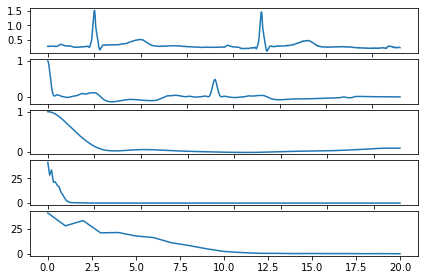

In [348]:
fig , ax = plt.subplots(5)

row= 0 
for i in range(0,5):
    ax[row].plot(feature1[i])
    ax[row].set_title("")
    row+=1
for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout(h_pad=0)

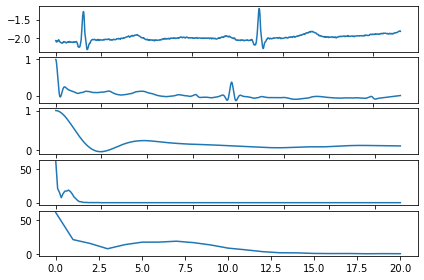

In [349]:
fig , ax = plt.subplots(5)

row= 0 
for i in range(0,5):
    ax[row].plot(feature2[i])
    ax[row].set_title("")
    row+=1
for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout(h_pad=0)

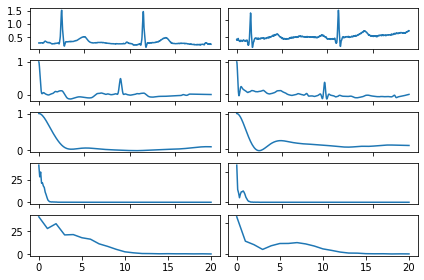

In [350]:
fig , ax = plt.subplots(5,2)

row= 0 
col = 0
count =0
for i in range(0,10):
    ax[row,col].plot(features[i])
    ax[row,col].set_title("")
    count+=1 
    row+=1
    if(count%5 == 0):
        col+=1
        row=0
for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout(h_pad=0.5,w_pad=0.5)